In [108]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

data = pd.read_csv('modified_data.tsv', sep='\t', header=None, names=[
    'URL', 'Name', 'Price', 'Color', 'Weight', 'Smart Features', 'Energy Class', 'Noise Level'
])

# Replace "not found" with NaN
data.replace(to_replace='.*not found.*', value=np.nan, regex=True, inplace=True)

# Total number of missing values
total_missing = data.isna().sum().sum()
# Number of missing values in each column
missing_per_column = data.isna().sum()
# Number of rows with at least one missing value
rows_with_missing = data.isna().any(axis=1).sum()
# Number of rows with more than one missing value
rows_with_multiple_missing = (data.isna().sum(axis=1) > 1).sum()

# Convert columns to numeric
data['Price'] = pd.to_numeric(data['Price'].str.replace(' €', ''), errors='coerce')
data['Weight'] = pd.to_numeric(data['Weight'].str.replace(' kg', ''), errors='coerce')
data['Noise Level'] = pd.to_numeric(data['Noise Level'].str.replace(' dB(A)', ''), errors='coerce')

# Handle missing values
data['Color'].fillna('Unknown', inplace=True)
data['Smart Features'].fillna('Unknown', inplace=True)
data['Energy Class'].fillna('Unknown', inplace=True)

# Selected columns
columns_to_analyze = ['Price', 'Color', 'Weight', 'Smart Features', 'Energy Class', 'Noise Level']

for column in columns_to_analyze:
    print(f"Column: {column}")
    print(f"Data Type: {data[column].dtype}")
    print(f"Number of Unique Values: {data[column].nunique()}")
    
    print("The Most Frequent Values:")
    print(data[column].value_counts().head(2))
    
    # Range for numerical columns
    if data[column].dtype in ['float64', 'int64']:
        print(f"Min: {data[column].min()}")
        print(f"Max: {data[column].max()}")
    
    print("-" * 30 + "\n")



Column: Price
Data Type: float64
Number of Unique Values: 69
The Most Frequent Values:
Price
499.0    9
749.0    6
Name: count, dtype: int64
Min: 34.95
Max: 3899.0
------------------------------

Column: Color
Data Type: object
Number of Unique Values: 12
The Most Frequent Values:
Color
White              76
Stainless Steel    28
Name: count, dtype: int64
------------------------------

Column: Weight
Data Type: float64
Number of Unique Values: 60
The Most Frequent Values:
Weight
30.0    6
55.0    5
Name: count, dtype: int64
Min: 5.0
Max: 152.0
------------------------------

Column: Smart Features
Data Type: object
Number of Unique Values: 3
The Most Frequent Values:
Smart Features
No     117
Yes     19
Name: count, dtype: int64
------------------------------

Column: Energy Class
Data Type: object
Number of Unique Values: 9
The Most Frequent Values:
Energy Class
E    78
D    20
Name: count, dtype: int64
------------------------------

Column: Noise Level
Data Type: float64
Number of 

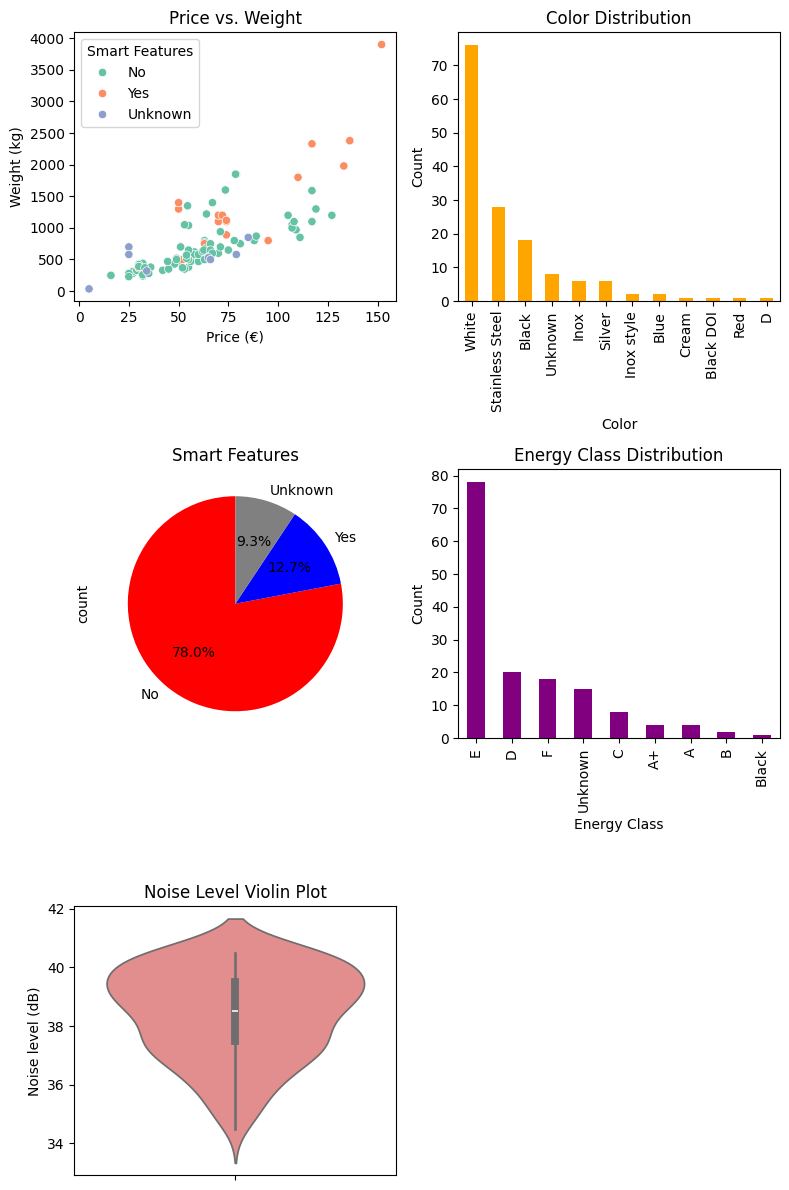

In [109]:
plt.figure(figsize=(8, 12))

# Price vs. Weight
plt.subplot(3, 2, 1)
sns.scatterplot(y=data['Price'], x=data['Weight'], hue=data['Smart Features'], palette='Set2')
plt.title('Price vs. Weight')
plt.xlabel('Price (€)')
plt.ylabel('Weight (kg)')

# Color distribution
plt.subplot(3, 2, 2)
data['Color'].value_counts().plot(kind='bar', color='orange')
plt.title('Color Distribution')
plt.xlabel('Color')
plt.ylabel('Count')

# Smart Features
plt.subplot(3, 2, 3)
data['Smart Features'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['red', 'blue', 'gray'], startangle=90)
plt.title('Smart Features')

# Energy Class distribution
plt.subplot(3, 2, 4)
data['Energy Class'].value_counts().plot(kind='bar', color='purple')
plt.title('Energy Class Distribution')
plt.xlabel('Energy Class')
plt.ylabel('Count')

# Noise Level distribution
plt.subplot(3, 2, 5)
sns.violinplot(y=data['Noise Level'], color='lightcoral')
plt.title('Noise Level Violin Plot')
plt.ylabel('Noise level (dB)')

plt.tight_layout()
plt.show()

Z prvního grafu price vs weight můžeme vyčíst že s vyšující se cenou roste také hmotnost lednice.

V druhém grafu vidíme že bílé lednice jsou zdaleka nejpopulárnější.

Drtivá většina lednic neobsahuje chytré prvky.

Nejčastější energetická třída je E a výrazně převyšuje všechny ostatní.

Hluk který lednice vydávají se pohybuje v  rozmezí 34 až 41 dB.

In [110]:
numerical_columns = ['Price', 'Weight', 'Noise Level']

# Detect outliers for each numerical column
for column in numerical_columns:
    print(f"Analyzing column: {column}")
    if data[column].notna().sum() > 0:  # Valid values
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1

        # Thresholds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)][column]

        print(f"  Q1: {Q1}, Q3: {Q3}, IQR: {IQR}")
        print(f"  Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")
        print(f"  Outliers detected ({len(outliers)}):")
        print(outliers.tolist())
    print("-" * 30 + "\n")

Analyzing column: Price
  Q1: 379.0, Q3: 836.5, IQR: 457.5
  Lower Bound: -307.25, Upper Bound: 1522.75
  Outliers detected (10):
[1849.0, 1979.0, 3899.0, 2379.0, 2379.0, 1799.0, 1849.0, 2329.0, 1589.0, 1599.0]
------------------------------

Analyzing column: Weight
  Q1: 44.875, Q3: 74.25, IQR: 29.375
  Lower Bound: 0.8125, Upper Bound: 118.3125
  Outliers detected (6):
[119.0, 133.0, 152.0, 127.0, 136.0, 136.0]
------------------------------

Analyzing column: Noise Level
  Q1: 37.5, Q3: 39.5, IQR: 2.0
  Lower Bound: 34.5, Upper Bound: 42.5
  Outliers detected (0):
[]
------------------------------



Zanalyzoval jsem číselné atributy pro nalezení outlierů, jako způsob jejich objevení jsem použil interkvartilové rozpětí. Odlehlé hodnoty budou identifikovány jako hodnoty, které leží mimo následující rozsah:

Dolní hranice=Q1−1.5\*IQR, horní hranice=Q3+1.5\*IQR

In [111]:
print("Total number of missing values:", total_missing)
print("\nMissing values per column:\n", missing_per_column)
print("\nNumber of rows with at least one missing value:", rows_with_missing)
print("Number of rows with more than one missing value:", rows_with_multiple_missing)

Total number of missing values: 89

Missing values per column:
 URL                0
Name               0
Price              0
Color              8
Weight            38
Smart Features    14
Energy Class      15
Noise Level       14
dtype: int64

Number of rows with at least one missing value: 74
Number of rows with more than one missing value: 12


Pearson Correlation Coefficient:
                Price    Weight  Noise Level
Price        1.000000  0.771992    -0.824532
Weight       0.771992  1.000000    -0.709019
Noise Level -0.824532 -0.709019     1.000000


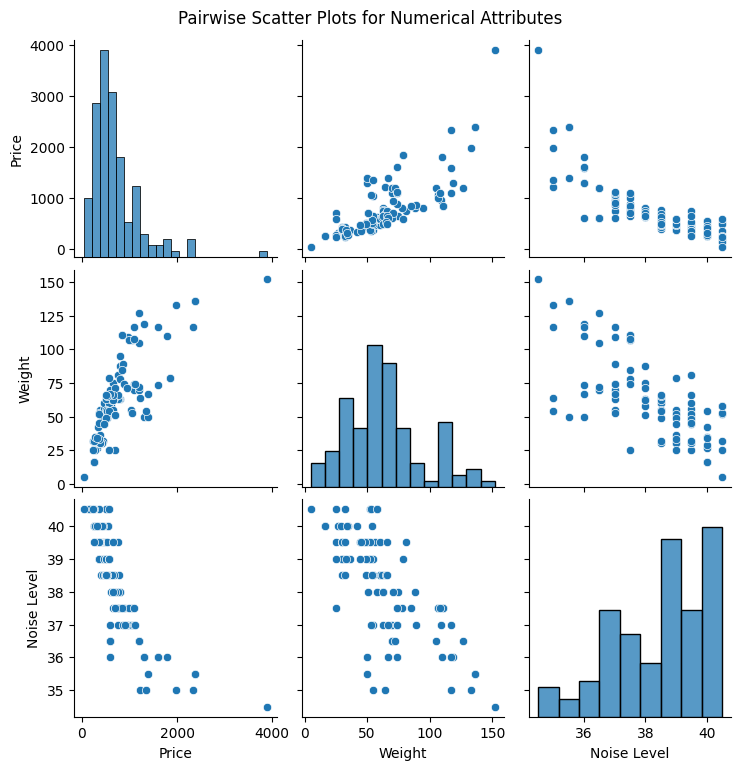

In [112]:
# Select numerical columns
numerical_columns = ['Price', 'Weight', 'Noise Level']

# Pearson correlation matrix
correlation_matrix = data[numerical_columns].corr()

print("Pearson Correlation Coefficient:")
print(correlation_matrix)

# Scatterplots for pairwise correlation
sns.pairplot(data[numerical_columns])
plt.suptitle('Pairwise Scatter Plots for Numerical Attributes', y=1.02)
plt.show()

Z korelace dat můžeme vyčíst že když roste cena, roste hmotnost a hluk naopak klesá, když roste váha, tak hluk také klesá